In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('~/Desktop/Data Modeling/customer-data.csv')

In [3]:
data.head()

,cust_id,cust_age,cust_income,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,...,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel
0,128179208,28,NaN,SELF EMPLOYED,M,12,Married,Rental,SC,0,...,0,0,0,0,0,29.000,0.08,0.04,0.54,0.28
1,332096146,54,NaN,HOMEMAKER,M,10,Married,Rental,RI,0,...,0,0,0,0,0,14.542,0.12,0.06,0.28,0.20
2,524603403,39,NaN,SALARIED,F,7,Married,Rental,OH,0,...,0,0,0,0,0,22.098,0.14,0.18,0.04,0.16
3,336346043,40,NaN,HOMEMAKER,M,6,Married,Rental,MA,0,...,0,0,0,0,0,23.900,0.20,0.28,0.36,0.12
4,74956300,40,NaN,OTHER,M,6,Married,Rental,NJ,0,...,0,0,0,0,0,23.900,0.06,0.34,0.14,0.18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102539 entries, 0 to 102538
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cust_id                   102539 non-null  int64  
 1   cust_age                  102539 non-null  int64  
 2   cust_income               95501 non-null   float64
 3   cust_profession           102539 non-null  object 
 4   gender                    102539 non-null  object 
 5   hhld_size                 102539 non-null  int64  
 6   marital_status            102539 non-null  object 
 7   residence_status          102539 non-null  object 
 8   state                     102539 non-null  object 
 9   response_flag             102539 non-null  int64  
 10  days_since_last_visit     102539 non-null  int64  
 11  months_since_first_purch  102539 non-null  int64  
 12  num_apparel_L6M           102539 non-null  int64  
 13  num_elec_L6M              102539 non-null  i

In [5]:
pd.set_option('display.max_columns', 70)

In [6]:
data.skew(axis = 0, skipna = True)

/var/folders/s5/sdqg9qvn0xl4bntbmypk1fb00000gn/T/ipykernel_55889/2341530724.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew(axis = 0, skipna = True)


cust_id                    -0.791594
cust_age                    0.324853
cust_income                 3.896452
hhld_size                   1.582859
response_flag               8.961686
days_since_last_visit      -2.032122
months_since_first_purch    0.648471
num_apparel_L6M             7.402701
num_elec_L6M                5.434361
num_haba_L6M                6.003864
num_hw_L6M                  3.913091
total_num_purch_L6M         2.493894
dollars_apparel_L6M         7.521808
dollars_elec_L6M            7.434813
dollars_haba_L6M            3.426668
dollars_hw_L6M              3.492971
total_dollars_L6M           2.295776
basket_margin               0.489384
margin_hw                   0.093485
margin_elec                 0.077095
margin_haba                 0.030845
margin_apparel              0.001793
dtype: float64

In [7]:
data.shape #102539 rows and 27 columns

(102539, 27)

### Summary Statistics

In [8]:
data.describe().round(2)

,cust_id,cust_age,cust_income,hhld_size,response_flag,days_since_last_visit,months_since_first_purch,num_apparel_L6M,num_elec_L6M,num_haba_L6M,num_hw_L6M,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel
count,1.025390e+05,102539.00,95501.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00,102539.00
mean,3.944623e+08,39.88,59903.92,1.56,0.01,181.84,19.44,0.78,0.78,1.59,3.10,6.17,236.43,239.18,379.81,822.40,1451.93,18.51,0.17,0.20,0.33,0.17
std,1.404098e+08,11.15,35485.60,0.93,0.11,55.64,13.90,2.31,2.20,4.03,6.51,10.46,976.68,985.14,998.65,2057.61,2870.31,6.05,0.09,0.11,0.19,0.10
min,7.450000e+04,19.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.04,0.04,0.00
25%,3.343551e+08,31.00,43200.00,1.00,0.00,187.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.03,0.08,0.10,0.16,0.08
50%,3.364123e+08,39.00,54000.00,1.00,0.00,205.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.02,0.16,0.20,0.34,0.16
75%,5.242883e+08,48.00,70800.00,2.00,0.00,208.00,29.00,1.00,1.00,1.00,4.00,9.00,14.00,14.00,161.00,475.00,1293.00,23.90,0.26,0.30,0.50,0.24
max,5.374117e+08,83.00,1069152.00,13.00,1.00,230.00,97.00,65.00,25.00,80.00,65.00,65.00,11000.00,11000.00,5000.00,11000.00,11000.00,29.50,0.34,0.40,0.66,0.34


In [9]:
data.describe(include='object')

,cust_profession,gender,marital_status,residence_status,state
count,102539,102539,102539,102539,102539
unique,6,2,4,4,25
top,SALARIED,M,Married,Homeowners,NJ
freq,52729,76061,53281,70952,14032


In [10]:
data.isna().sum() #No Null Values in Dataset

cust_id                        0
cust_age                       0
cust_income                 7038
cust_profession                0
gender                         0
hhld_size                      0
marital_status                 0
residence_status               0
state                          0
response_flag                  0
days_since_last_visit          0
months_since_first_purch       0
num_apparel_L6M                0
num_elec_L6M                   0
num_haba_L6M                   0
num_hw_L6M                     0
total_num_purch_L6M            0
dollars_apparel_L6M            0
dollars_elec_L6M               0
dollars_haba_L6M               0
dollars_hw_L6M                 0
total_dollars_L6M              0
basket_margin                  0
margin_hw                      0
margin_elec                    0
margin_haba                    0
margin_apparel                 0
dtype: int64

In [11]:
#Only taking some variables for our analysis which we think are best indicators

In [12]:
data = data.drop('cust_id', axis = 1)                  

In [13]:
data = data[data['state']!='0']

In [14]:
data.shape #101609 rows after removing state = '0'

(101609, 26)

In [15]:
data_test = data[data['cust_income'].isna()]

In [16]:
data_train = data[data['cust_income'].notna()]

In [17]:
data_train = data_train.drop(['residence_status', 'state'], axis=1)
data_test = data_test.drop(['residence_status', 'state'], axis=1)
data_test = pd.get_dummies(data_test, drop_first=True)
data_train = pd.get_dummies(data_train, drop_first=True)

In [18]:
data_test.columns

Index(['cust_age', 'cust_income', 'hhld_size', 'response_flag',
       'days_since_last_visit', 'months_since_first_purch', 'num_apparel_L6M',
       'num_elec_L6M', 'num_haba_L6M', 'num_hw_L6M', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'total_dollars_L6M', 'basket_margin', 'margin_hw',
       'margin_elec', 'margin_haba', 'margin_apparel', 'cust_profession_OTHER',
       'cust_profession_SALARIED', 'cust_profession_SELF EMPLOYED',
       'cust_profession_STUDENT', 'cust_profession_UNEMPLOYED', 'gender_M',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown'],
      dtype='object')

In [19]:
y_train = data_train[['cust_income']]
y_test = data_test[['cust_income']]
x_train = data_train.drop('cust_income', axis=1)
x_test = data_test.drop('cust_income', axis=1)

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

In [21]:
import numpy as np
missing_indices = np.isnan(data['cust_income'])

# Replace the missing values in 'cust_income' column with the predicted values
data.loc[missing_indices, 'cust_income'] = y_pred

In [22]:
data_test = data[data['cust_income']==0]
data_train = data[data['cust_income'].notna()]
data_train = data_train.drop(['residence_status', 'state'], axis=1)
data_test = data_test.drop(['residence_status', 'state'], axis=1)
data_test = pd.get_dummies(data_test, drop_first=True)
data_train = pd.get_dummies(data_train, drop_first=True)

In [23]:
y_train = data_train[['cust_income']]
y_test = data_test[['cust_income']]
x_train = data_train.drop('cust_income', axis=1)
x_test = data_test.drop('cust_income', axis=1)

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

In [25]:
# Replace zero values in 'cust_income' with predicted values
data.loc[data['cust_income'] == 0, 'cust_income'] = lm.predict(x_test[data['cust_income'] == 0])

/var/folders/s5/sdqg9qvn0xl4bntbmypk1fb00000gn/T/ipykernel_55889/1071194650.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.loc[data['cust_income'] == 0, 'cust_income'] = lm.predict(x_test[data['cust_income'] == 0])


In [26]:
data.describe().round(2)

,cust_age,cust_income,hhld_size,response_flag,days_since_last_visit,months_since_first_purch,num_apparel_L6M,num_elec_L6M,num_haba_L6M,num_hw_L6M,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel
count,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00,101609.00
mean,39.88,62603.60,1.56,0.01,181.88,19.41,0.78,0.78,1.59,3.11,6.18,236.10,239.14,379.62,821.77,1451.54,18.49,0.17,0.20,0.33,0.17
std,11.15,32376.52,0.93,0.11,55.58,13.89,2.31,2.20,4.04,6.51,10.47,975.44,984.15,998.07,2055.99,2868.84,6.05,0.09,0.11,0.19,0.10
min,19.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.04,0.04,0.00
25%,31.00,45600.00,1.00,0.00,190.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.03,0.08,0.10,0.16,0.08
50%,39.00,55836.00,1.00,0.00,205.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.02,0.16,0.20,0.34,0.16
75%,48.00,72000.00,2.00,0.00,208.00,29.00,1.00,1.00,1.00,4.00,9.00,14.00,15.00,161.00,476.00,1293.00,23.90,0.26,0.30,0.50,0.24
max,83.00,1069152.00,13.00,1.00,230.00,97.00,65.00,25.00,80.00,65.00,65.00,11000.00,11000.00,5000.00,11000.00,11000.00,29.50,0.34,0.40,0.66,0.34


In [27]:
analysis = data.drop(['hhld_size', 'residence_status', 'state', 'total_dollars_L6M','margin_hw','margin_elec', 'margin_haba', 'margin_apparel', 'num_apparel_L6M', 'num_elec_L6M', 'num_haba_L6M', 'num_hw_L6M' ], axis = 1)

## CORRELATION MATRIX

In [28]:
pd.options.display.max_rows=100

In [29]:
analysis.columns

Index(['cust_age', 'cust_income', 'cust_profession', 'gender',
       'marital_status', 'response_flag', 'days_since_last_visit',
       'months_since_first_purch', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'basket_margin'],
      dtype='object')

In [30]:
x= analysis[['cust_age', 'cust_income','response_flag', 'days_since_last_visit',
       'months_since_first_purch', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'basket_margin']]  #Continuous Variables

<AxesSubplot:>

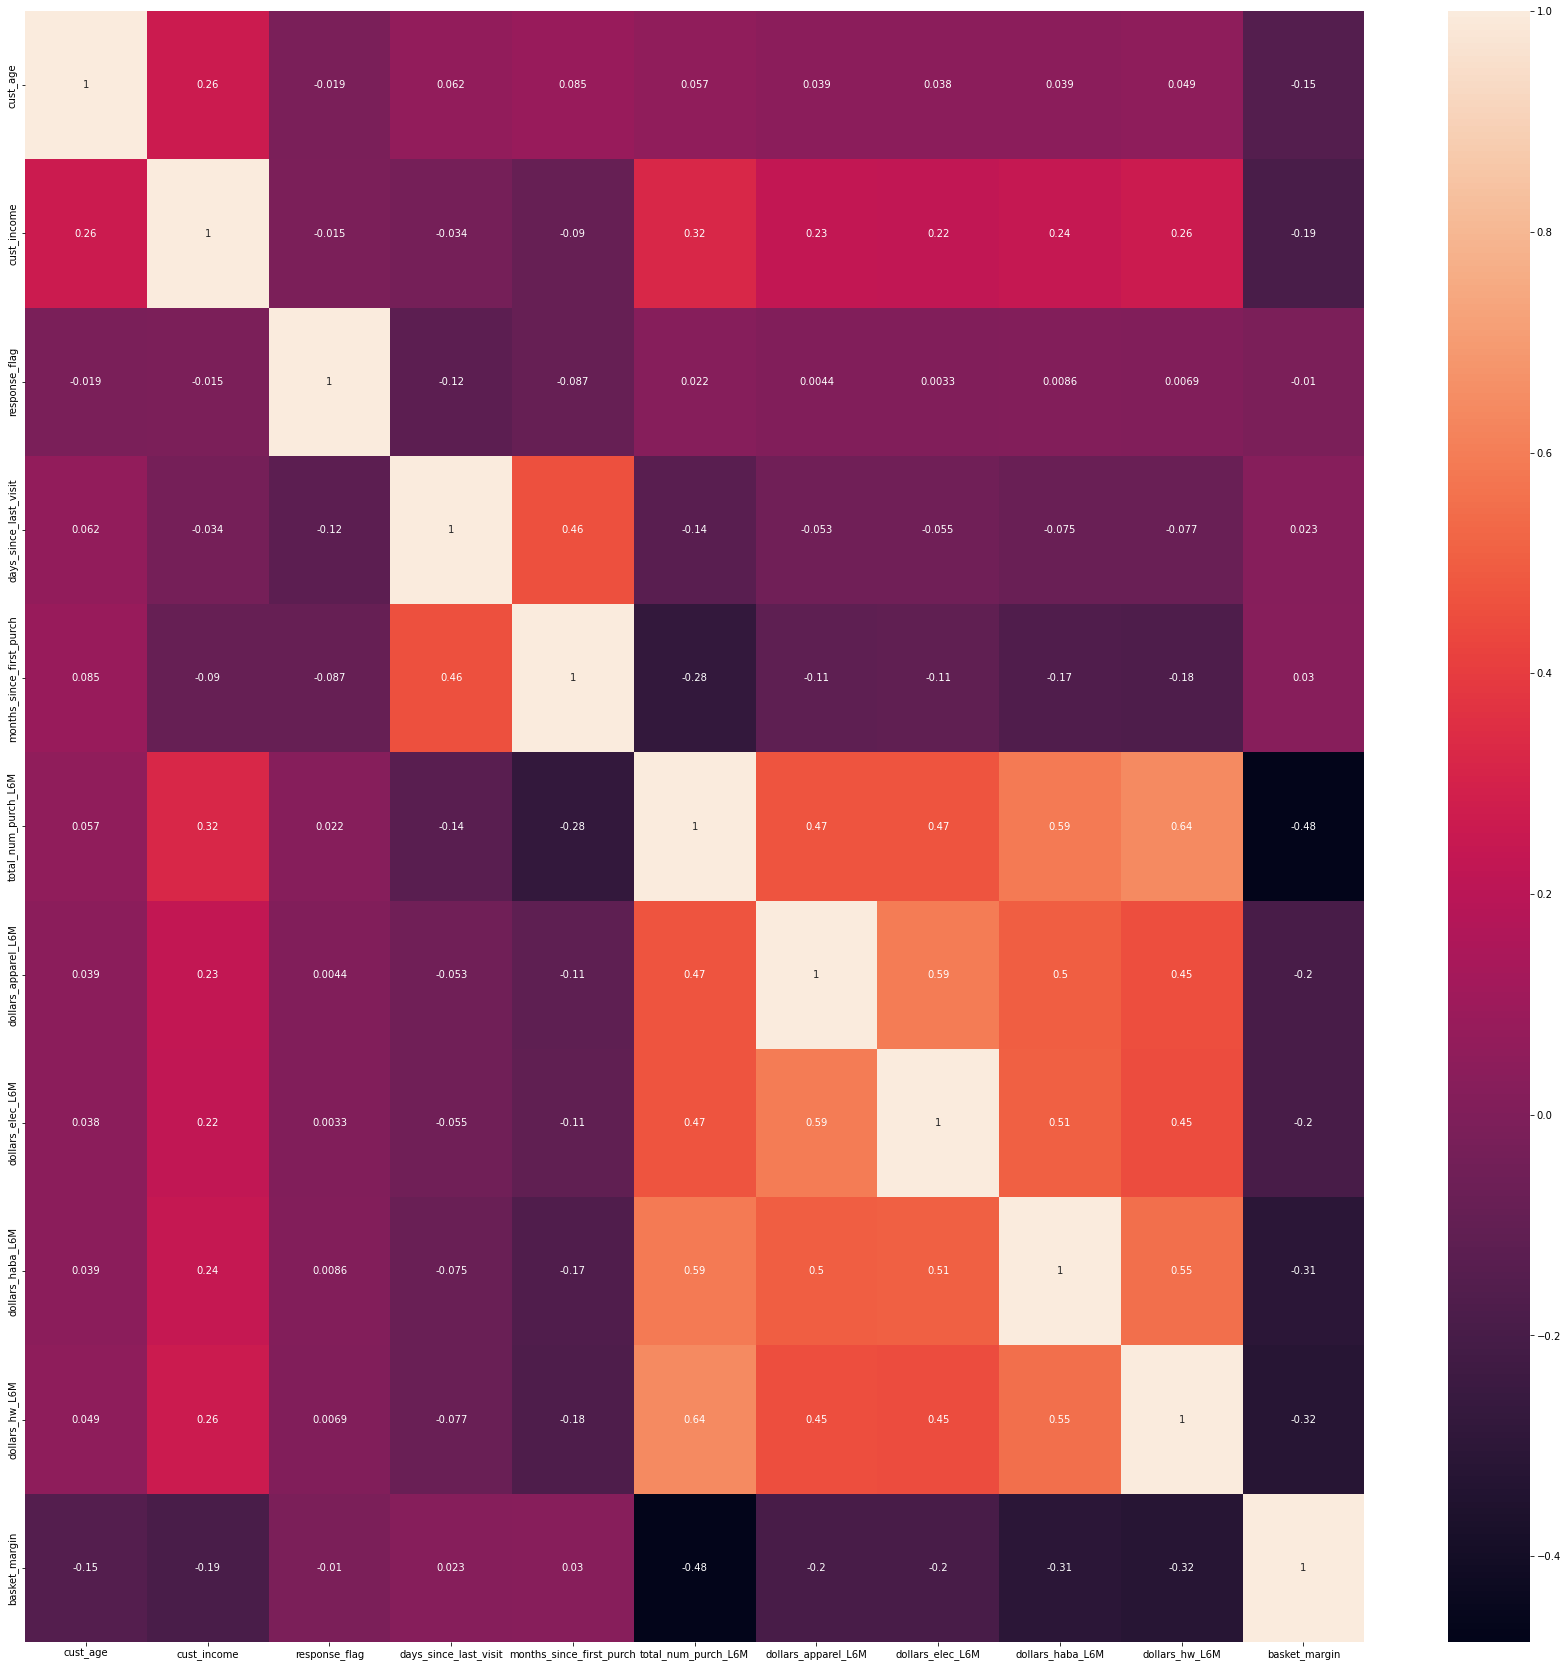

In [31]:
plt.figure(figsize=(30, 30))
sns.heatmap(x.corr(),annot=True)

In [32]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

                    Variable        VIF
0                   cust_age  11.188850
1                cust_income   5.595469
2              response_flag   1.021186
3      days_since_last_visit  12.278052
4   months_since_first_purch   4.050976
5        total_num_purch_L6M   3.047983
6        dollars_apparel_L6M   1.852586
7           dollars_elec_L6M   1.863564
8           dollars_haba_L6M   2.121295
9             dollars_hw_L6M   2.205058
10             basket_margin   7.683971


In [33]:
object_cols = [col for col in data.columns if data[col].dtype =='object']

In [34]:
object_cols

['cust_profession', 'gender', 'marital_status', 'residence_status', 'state']

In [35]:
object_nunique = list(map(lambda col: data[col].nunique(), object_cols))
object_nunique

[6, 2, 4, 4, 24]

In [36]:
data['cust_profession'].unique()

array(['SELF EMPLOYED', 'HOMEMAKER', 'SALARIED', 'OTHER', 'UNEMPLOYED',
       'STUDENT'], dtype=object)

In [37]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [38]:
data['marital_status'].unique()

array(['Married', 'Divorced / Separated', 'Unknown', 'Single'],
      dtype=object)

In [39]:
data['residence_status'].unique()

array(['Rental', 'Other', 'Homeowners', 'Unknown'], dtype=object)

In [40]:
data['state'].unique()

array(['SC', 'RI', 'OH', 'MA', 'NJ', 'NY', 'IL', 'DE', 'MD', 'GA', 'KY',
       'FL', 'PA', 'NC', 'VA', 'CA', 'CT', 'NH', 'TN', 'MI', 'IN', 'WA',
       'WI', 'LA'], dtype=object)

In [41]:
## Northeast
  ###Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)
  ###CT, ME, MA, RI, VT
  ###Division 2: Middle Atlantic (New Jersey, New York, and Pennsylvania)
  ### NJ, NY, PA
##Midwest (Before June 1984, the Midwest Region was designated as the North Central Region.)[8]
  ###Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)
  ###IL,IN, MI, OH,WI
  ### Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)
  ###IA,KS,MN, MO,NE, ND,SD
##Region 3: South
  ###Division 5: South Atlantic (Delaware; Florida; Georgia; Maryland; North Carolina; South Carolina; Virginia; Washington, D.C. and West Virginia)
  ### DE, FL,GA,MD, NC,SC,VA, DC, WV
  ###Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
  ###AL, KY,MS,TN
  ###Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)
  ###AR,LA,OK,TX
##Region 4: West
  ###Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
  ###AZ,CO,ID,MT,NV,NM, UT,WY
  ###Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)
  ### AK, CA, HI,OR, WA

In [42]:
northeast = ['CT', 'ME', 'MA', 'RI', 'VT', 'NJ', 'NY', 'PA', 'NH']
midwest = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
south = ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']
west = ['AZ', 'CO','ID','MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']

In [43]:
def get_region(state):
    if state in northeast:
        return 'northeast'
    elif state in midwest:
        return 'midwest'
    elif state in south:
        return 'south'
    elif state in west:
        return 'west'
    else:
        return None

In [44]:
# Apply the function to the 'state' column and create a new 'region' column
data['region'] = data['state'].apply(get_region)

In [45]:
data['region'].value_counts()

northeast    55084
south        30804
midwest      11659
west          4062
Name: region, dtype: int64

In [46]:
data = data.drop('state', axis = 1)

In [47]:
analysis['region'] = data['region']

## Whole Data

In [48]:
data1 = data.drop(['margin_hw',
       'margin_elec', 'margin_haba', 'margin_apparel','num_apparel_L6M',
       'num_elec_L6M', 'num_haba_L6M', 'num_hw_L6M','total_dollars_L6M'], axis=1)

In [49]:
data_dummies = pd.get_dummies(data1)

In [50]:
data_dummies

,cust_age,cust_income,hhld_size,response_flag,days_since_last_visit,months_since_first_purch,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,basket_margin,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_midwest,region_northeast,region_south,region_west
0,28,90511.094109,12,0,205,24,0,0,0,0,0,29.000,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,54,83618.224024,10,0,206,56,0,0,0,0,0,14.542,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,39,73155.348765,7,0,206,13,0,0,0,0,0,22.098,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,40,67395.740610,6,0,120,4,0,0,0,0,0,23.900,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
4,40,108115.075347,6,0,204,8,0,0,0,0,0,23.900,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,47594.022720,1,0,205,14,7,398,1398,1681,719,13.946,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
102535,56,53062.978008,1,0,208,16,1,0,0,466,0,15.086,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
102536,58,64133.916722,1,0,207,15,16,0,0,201,2509,7.904,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0
102537,36,51407.228419,1,0,213,15,5,134,0,600,0,13.200,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [51]:
data_dummies.columns

Index(['cust_age', 'cust_income', 'hhld_size', 'response_flag',
       'days_since_last_visit', 'months_since_first_purch',
       'total_num_purch_L6M', 'dollars_apparel_L6M', 'dollars_elec_L6M',
       'dollars_haba_L6M', 'dollars_hw_L6M', 'basket_margin',
       'cust_profession_HOMEMAKER', 'cust_profession_OTHER',
       'cust_profession_SALARIED', 'cust_profession_SELF EMPLOYED',
       'cust_profession_STUDENT', 'cust_profession_UNEMPLOYED', 'gender_F',
       'gender_M', 'marital_status_Divorced / Separated',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'residence_status_Homeowners',
       'residence_status_Other', 'residence_status_Rental',
       'residence_status_Unknown', 'region_midwest', 'region_northeast',
       'region_south', 'region_west'],
      dtype='object')

In [52]:
data_dummies[['cust_profession_HOMEMAKER', 'cust_profession_OTHER',
       'cust_profession_SALARIED', 'cust_profession_SELF EMPLOYED',
       'cust_profession_STUDENT', 'cust_profession_UNEMPLOYED', 'gender_F',
       'gender_M', 'marital_status_Divorced / Separated',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'residence_status_Homeowners',
       'residence_status_Other', 'residence_status_Rental',
       'residence_status_Unknown', 'region_midwest', 'region_northeast',
       'region_south', 'region_west']] = data_dummies[['cust_profession_HOMEMAKER', 'cust_profession_OTHER',
       'cust_profession_SALARIED', 'cust_profession_SELF EMPLOYED',
       'cust_profession_STUDENT', 'cust_profession_UNEMPLOYED', 'gender_F',
       'gender_M', 'marital_status_Divorced / Separated',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'residence_status_Homeowners',
       'residence_status_Other', 'residence_status_Rental',
       'residence_status_Unknown', 'region_midwest', 'region_northeast',
       'region_south', 'region_west']].astype(int)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
data_scaled = pd.DataFrame(scaler.fit_transform(data_dummies[['cust_age', 'cust_income', 'hhld_size',
       'days_since_last_visit', 'months_since_first_purch',
       'total_num_purch_L6M', 'dollars_apparel_L6M', 'dollars_elec_L6M',
       'dollars_haba_L6M', 'dollars_hw_L6M', 'basket_margin']]))

In [55]:
data_scaled.columns = ['cust_age', 'cust_income', 'hhld_size',
       'days_since_last_visit', 'months_since_first_purch',
       'total_num_purch_L6M', 'dollars_apparel_L6M', 'dollars_elec_L6M',
       'dollars_haba_L6M', 'dollars_hw_L6M', 'basket_margin']
data_dummies = data_dummies.drop(['cust_age', 'cust_income', 'hhld_size',
       'days_since_last_visit', 'months_since_first_purch',
       'total_num_purch_L6M', 'dollars_apparel_L6M', 'dollars_elec_L6M',
       'dollars_haba_L6M', 'dollars_hw_L6M', 'basket_margin'], axis=1)
data_scaled.reset_index(drop=True, inplace=True)
data_dummies.reset_index(drop=True, inplace=True)

In [56]:
data_final = pd.concat([data_scaled, data_dummies], axis=1)

## Analysis

In [58]:
analysis_dummies = pd.get_dummies(analysis)

In [59]:
analysis_dummies.columns

Index(['cust_age', 'cust_income', 'response_flag', 'days_since_last_visit',
       'months_since_first_purch', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'basket_margin', 'cust_profession_HOMEMAKER',
       'cust_profession_OTHER', 'cust_profession_SALARIED',
       'cust_profession_SELF EMPLOYED', 'cust_profession_STUDENT',
       'cust_profession_UNEMPLOYED', 'gender_F', 'gender_M',
       'marital_status_Divorced / Separated', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown', 'region_midwest',
       'region_northeast', 'region_south', 'region_west'],
      dtype='object')

In [60]:
analysis_dummies[['cust_profession_HOMEMAKER',
       'cust_profession_OTHER', 'cust_profession_SALARIED',
       'cust_profession_SELF EMPLOYED', 'cust_profession_STUDENT',
       'cust_profession_UNEMPLOYED', 'gender_F', 'gender_M',
       'marital_status_Divorced / Separated', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown', 'region_midwest',
       'region_northeast', 'region_south', 'region_west']] = analysis_dummies[['cust_profession_HOMEMAKER',
       'cust_profession_OTHER', 'cust_profession_SALARIED',
       'cust_profession_SELF EMPLOYED', 'cust_profession_STUDENT',
       'cust_profession_UNEMPLOYED', 'gender_F', 'gender_M',
       'marital_status_Divorced / Separated', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown', 'region_midwest',
       'region_northeast', 'region_south', 'region_west']].astype(int)

In [61]:
analysis_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101609 entries, 0 to 102538
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   cust_age                             101609 non-null  int64  
 1   cust_income                          101609 non-null  float64
 2   response_flag                        101609 non-null  int64  
 3   days_since_last_visit                101609 non-null  int64  
 4   months_since_first_purch             101609 non-null  int64  
 5   total_num_purch_L6M                  101609 non-null  int64  
 6   dollars_apparel_L6M                  101609 non-null  int64  
 7   dollars_elec_L6M                     101609 non-null  int64  
 8   dollars_haba_L6M                     101609 non-null  int64  
 9   dollars_hw_L6M                       101609 non-null  int64  
 10  basket_margin                        101609 non-null  float64
 11  cust_professi

In [62]:
analysis_dummies.columns

Index(['cust_age', 'cust_income', 'response_flag', 'days_since_last_visit',
       'months_since_first_purch', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'basket_margin', 'cust_profession_HOMEMAKER',
       'cust_profession_OTHER', 'cust_profession_SALARIED',
       'cust_profession_SELF EMPLOYED', 'cust_profession_STUDENT',
       'cust_profession_UNEMPLOYED', 'gender_F', 'gender_M',
       'marital_status_Divorced / Separated', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown', 'region_midwest',
       'region_northeast', 'region_south', 'region_west'],
      dtype='object')

In [63]:
analysis_scaled = pd.DataFrame(scaler.fit_transform(analysis_dummies[['cust_age', 'cust_income','days_since_last_visit',
       'months_since_first_purch', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'basket_margin']]))

In [64]:
analysis_scaled

,0,1,2,3,4,5,6,7,8,9
0,-1.065429,0.861971,0.415990,0.330217,-0.590257,-0.242043,-0.242987,-0.380359,-0.399698,1.737163
1,1.265669,0.649073,0.433982,2.634277,-0.590257,-0.242043,-0.242987,-0.380359,-0.399698,-0.653404
2,-0.079195,0.325909,0.433982,-0.461804,-0.590257,-0.242043,-0.242987,-0.380359,-0.399698,0.595947
3,0.010462,0.148014,-1.113278,-1.109821,-0.590257,-0.242043,-0.242987,-0.380359,-0.399698,0.893900
4,0.010462,1.405701,0.397999,-0.821813,-0.590257,-0.242043,-0.242987,-0.380359,-0.399698,0.893900
...,...,...,...,...,...,...,...,...,...,...
101604,-1.424060,-0.463597,0.415990,-0.389802,0.078552,0.165981,1.177531,1.303896,-0.049986,-0.751950
101605,1.444984,-0.294679,0.469964,-0.245798,-0.494713,-0.242043,-0.242987,0.086543,-0.399698,-0.563456
101606,1.624300,0.047267,0.451973,-0.317800,0.938448,-0.242043,-0.242987,-0.178970,0.820646,-1.750969
101607,-0.348168,-0.345819,0.559921,-0.317800,-0.112536,-0.104668,-0.242987,0.220803,-0.399698,-0.875298


In [65]:
analysis_scaled.columns = ['cust_age', 'cust_income', 'days_since_last_visit',
       'months_since_first_purch', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'basket_margin']
analysis_dummies = analysis_dummies.drop(['cust_age', 'cust_income', 'days_since_last_visit',
       'months_since_first_purch', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'basket_margin'], axis=1)
analysis_scaled.reset_index(drop=True, inplace=True)
analysis_dummies.reset_index(drop=True, inplace=True)

In [66]:
analysis_final = pd.concat([analysis_scaled, analysis_dummies], axis=1)

In [67]:
analysis_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101609 entries, 0 to 101608
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   cust_age                             101609 non-null  float64
 1   cust_income                          101609 non-null  float64
 2   days_since_last_visit                101609 non-null  float64
 3   months_since_first_purch             101609 non-null  float64
 4   total_num_purch_L6M                  101609 non-null  float64
 5   dollars_apparel_L6M                  101609 non-null  float64
 6   dollars_elec_L6M                     101609 non-null  float64
 7   dollars_haba_L6M                     101609 non-null  float64
 8   dollars_hw_L6M                       101609 non-null  float64
 9   basket_margin                        101609 non-null  float64
 10  response_flag                        101609 non-null  int64  
 11  cust_professi

In [68]:
# Get the length of the original dataframe
n = len(analysis_final)
np.random.seed(0)
# Randomly select 50000 indices
indices = np.random.choice(n, size=50000, replace=False)

In [69]:
# Get the random subset of data using the selected indices
random_subset_df = analysis_final.iloc[indices]
# Reset the index of the random subset dataframe
random_subset_df = random_subset_df.reset_index(drop=True)

In [70]:
random_subset_df['response_flag'].value_counts()

0    49385
1      615
Name: response_flag, dtype: int64

In [71]:
random_subset_df.to_csv('subset.csv')

In [72]:
# Create a subset for 'midwest' region
midwest_data = data_final[data_final['region_midwest'] == 1]

# Create a subset for 'northeast' region
northeast_data = data_final[data_final['region_northeast'] == 1]

# Create a subset for 'south' region
south_data = data_final[data_final['region_south'] == 1]

# Create a subset for 'west' region
west_data = data_final[data_final['region_west'] == 1]
# Analysis on region wise (4 different analyses)- HC - 2 CLUSTERS

### PCA

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=random_subset_df.shape[1])
pca.fit(random_subset_df)#finding new axis
pca_data = pca.transform(random_subset_df)#representing data using new rotated axis

In [74]:
#to find variance captured by new PCA components
pca.explained_variance_ratio_

array([2.89114573e-01, 1.23667454e-01, 1.02513246e-01, 7.55839521e-02,
       5.93969097e-02, 4.89344391e-02, 4.45034784e-02, 3.66978529e-02,
       3.40574599e-02, 3.26322377e-02, 3.15750712e-02, 2.67293680e-02,
       2.35968606e-02, 2.21020663e-02, 1.25690631e-02, 1.02431710e-02,
       9.37697961e-03, 5.53784120e-03, 4.19734842e-03, 3.99127724e-03,
       1.19332841e-03, 9.81868334e-04, 8.04154473e-04, 1.94987898e-33,
       1.35501133e-33, 1.35501133e-33, 1.35501133e-33])

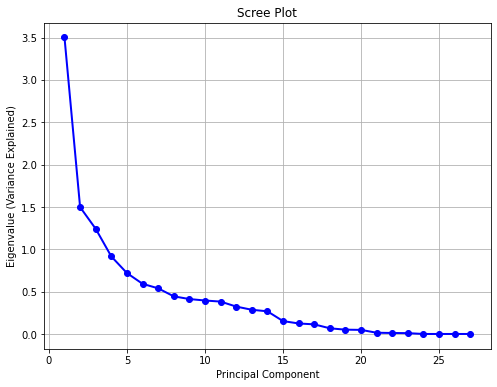

In [75]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, random_subset_df.shape[1] + 1), pca.explained_variance_, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance Explained)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

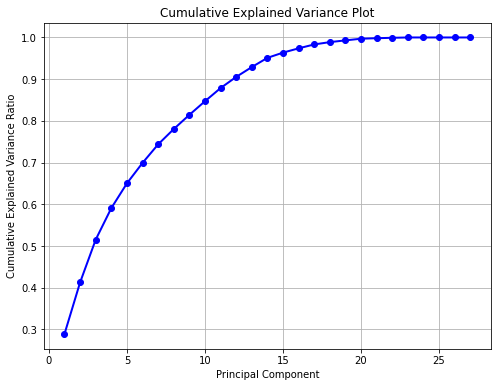

In [76]:
# Cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, random_subset_df.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_), 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [77]:
pca = PCA(n_components= 10)
pca.fit(random_subset_df)#finding new axis
pca_data = pca.transform(random_subset_df)

In [78]:
pca.explained_variance_ratio_

array([0.28911457, 0.12366745, 0.10251325, 0.07558395, 0.05939691,
       0.04893444, 0.04450348, 0.03669785, 0.03405746, 0.03263224])

In [79]:
pc_columns = ['PC{}'.format(i+1) for i in range(10)]
pca_data = pd.DataFrame(pca_data, columns=pc_columns)

In [80]:
loadings = pca.components_

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(loadings, columns=random_subset_df.columns)

In [81]:
for i in range(10):
    loadings_pc = loadings_df.loc[i, :]
    print("Loadings for PC{}:\n".format(i+1), loadings_pc)

Loadings for PC1:
 cust_age                               0.075888
cust_income                            0.243750
days_since_last_visit                 -0.098193
months_since_first_purch              -0.168325
total_num_purch_L6M                    0.445609
dollars_apparel_L6M                    0.364670
dollars_elec_L6M                       0.373479
dollars_haba_L6M                       0.416706
dollars_hw_L6M                         0.411175
basket_margin                         -0.274840
response_flag                          0.001253
cust_profession_HOMEMAKER              0.025615
cust_profession_OTHER                  0.019399
cust_profession_SALARIED               0.010550
cust_profession_SELF EMPLOYED         -0.057061
cust_profession_STUDENT                0.001232
cust_profession_UNEMPLOYED             0.000264
gender_F                              -0.033405
gender_M                               0.033405
marital_status_Divorced / Separated   -0.001128
marital_status_Marrie

In [82]:
#PC1:total_num_purch_L6M                    0.445607
#dollars_apparel_L6M                    0.364671
#dollars_elec_L6M                       0.373479
#dollars_haba_L6M                       0.416705
#dollars_hw_L6M                         0.411175
#PC2:  cust_age                               0.468512
#days_since_last_visit                  0.568553
#months_since_first_purch               0.574827
#PC3:cust_age                               0.575311
#cust_income                            0.396886
#PC4: basket_margin                          0.761148
#dollars_apparel_L6M                    0.345606
#dollars_elec_L6M                       0.350936
#Region_northeast                       0.028271
#PC5: cust_income                            0.732826
#PC6: months_since_first_purch               0.329435
#dollars_apparel_L6M                    0.310266
#PC7: days_since_last_visit                  0.514683
#PC8: dollars_apparel_L6M                    0.178830
#PC9: gender_F                               0.356363
#cust_profession_SALARIED               0.312563
#PC10:dollars_apparel_L6M                    0.701417

In [83]:
#final1 = pd.concat([final, pca_data], axis=1)

In [84]:
#loadings1 = final1.corr()
#plt.figure(figsize=(60, 60))
#sns.heatmap(loadings1,annot=True)

In [85]:
# Filter out correlations that are not greater than 0.7 or less than -0.7
#loadings1 = loadings1[(loadings1 > 0.7) | (loadings1 < -0.7)]

# Set the plot size
#plt.figure(figsize=(30, 30))

# Create a heatmap of the filtered correlation matrix using seaborn
#sns.heatmap(loadings1, annot=True)

## hierarchical

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
#west 3 clusters
#northeast 2 clusters
#midwest 2 clusters
#south 2 clusters

In [87]:
linked_w = linkage(west_data, 'ward')#gets a n-1 *4 matrix

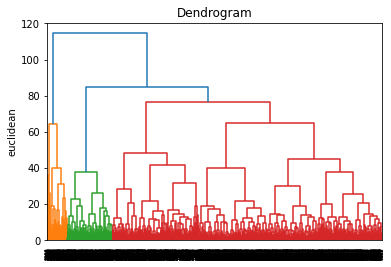

In [88]:
dendrogram(linked_w) #uses the matrix to get to draw the dendrogram
plt.title("Dendrogram")
plt.ylabel('euclidean')
plt.show()

In [89]:
hc_w=AgglomerativeClustering(n_clusters=3, linkage='ward')#initialize
hc_w.fit(west_data)

AgglomerativeClustering(n_clusters=3)

In [90]:
west_data['clusters']=hc_w.labels_

/var/folders/s5/sdqg9qvn0xl4bntbmypk1fb00000gn/T/ipykernel_55889/201127481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_data['clusters']=hc_w.labels_


In [91]:
# Create a copy of the original dataframe to avoid modifying the original data
df = data.copy()

In [92]:
# Assign cluster labels to the subset of 'west' region
df.loc[df['region'] == 'west', 'cluster_label'] = hc_w.labels_
df['cluster_label'] = df['cluster_label'].fillna(0)
df['cluster_label'] = df['cluster_label'].astype(int)

In [93]:
west_data.groupby('clusters').mean()

,cust_age,cust_income,hhld_size,days_since_last_visit,months_since_first_purch,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,basket_margin,response_flag,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_midwest,region_northeast,region_south,region_west
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.048962,-0.120235,0.103747,0.351692,0.124073,-0.231419,-0.160488,-0.164419,-0.207764,-0.200489,0.036871,0.003363,0.077041,0.051972,0.526445,0.327117,0.003057,0.014369,0.262917,0.737083,0.100581,0.521247,0.332314,0.045858,0.667074,0.111587,0.136350,0.084989,0.0,0.0,0.0,1.0
1,0.082115,0.400040,-0.081683,-0.611953,-0.681941,1.861389,1.922300,1.830501,2.581633,2.277517,-0.839106,0.024590,0.192623,0.143443,0.504098,0.139344,0.004098,0.016393,0.143443,0.856557,0.090164,0.577869,0.295082,0.036885,0.618852,0.151639,0.180328,0.049180,0.0,0.0,0.0,1.0
2,-0.318173,-0.236777,-0.085155,-2.106127,-1.089549,-0.122842,-0.169270,-0.154320,-0.232833,-0.219780,0.201974,0.067642,0.074954,0.040219,0.563071,0.310786,0.001828,0.009141,0.243144,0.756856,0.113346,0.436929,0.431444,0.018282,0.659963,0.087751,0.091408,0.160878,0.0,0.0,0.0,1.0


In [94]:
west_data['clusters'].value_counts()

0    3271
2     547
1     244
Name: clusters, dtype: int64

In [95]:
# Assuming you have the means of response_flag for each cluster as follows
response_flag_means = {0: 0.003363, 1: 0.024590, 2: 0.067642}

# Calculate the actual percentage of responders for each cluster
for i, cluster in enumerate(response_flag_means):
    mean = response_flag_means[i]
    percentage = mean * 100
    print(f"Cluster {cluster}: Actual Percentage of Responders = {percentage:.2f}%")

Cluster 0: Actual Percentage of Responders = 0.34%
Cluster 1: Actual Percentage of Responders = 2.46%
Cluster 2: Actual Percentage of Responders = 6.76%


In [96]:
linked_mw = linkage(midwest_data, 'ward')

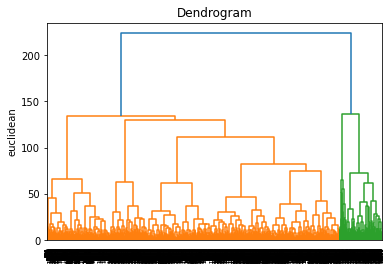

In [97]:
dendrogram(linked_mw) #uses the matrix to get to draw the dendrogram
plt.title("Dendrogram")
plt.ylabel('euclidean')
plt.show()

In [98]:
hc_mw=AgglomerativeClustering(n_clusters=2, linkage='ward')#initialize
hc_mw.fit(midwest_data)
midwest_data['clusters']=hc_mw.labels_

/var/folders/s5/sdqg9qvn0xl4bntbmypk1fb00000gn/T/ipykernel_55889/235601157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midwest_data['clusters']=hc_mw.labels_


In [99]:
midwest_data.groupby('clusters').mean()

,cust_age,cust_income,hhld_size,days_since_last_visit,months_since_first_purch,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,basket_margin,response_flag,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_midwest,region_northeast,region_south,region_west
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.000169,0.482614,-0.135646,-0.114688,-0.427308,1.588921,1.387110,1.308292,1.995679,1.909326,-0.846457,0.015764,0.178890,0.087731,0.583962,0.136395,0.006169,0.006854,0.137766,0.862234,0.081563,0.507197,0.393420,0.017820,0.734750,0.056888,0.154901,0.053461,1.0,0.0,0.0,0.0
1,-0.090569,-0.153081,0.008808,0.050199,0.103503,-0.209907,-0.183831,-0.179533,-0.275024,-0.257606,0.160239,0.010000,0.087843,0.049902,0.513529,0.339314,0.003529,0.005882,0.259608,0.740392,0.094804,0.501569,0.373039,0.030588,0.706275,0.056765,0.137255,0.099706,1.0,0.0,0.0,0.0


In [100]:
midwest_data['clusters'].value_counts()

1    10200
0     1459
Name: clusters, dtype: int64

In [101]:
response_flag_means = {0: 0.015764, 1: 0.010000}

# Calculate the actual percentage of responders for each cluster
for i, cluster in enumerate(response_flag_means):
    mean = response_flag_means[i]
    percentage = mean * 100
    print(f"Cluster {cluster}: Actual Percentage of Responders = {percentage:.2f}%")

Cluster 0: Actual Percentage of Responders = 1.58%
Cluster 1: Actual Percentage of Responders = 1.00%


In [102]:
# Assign cluster labels to the subset of 'midwest' region
df.loc[df['region'] == 'midwest', 'cluster_label'] = hc_mw.labels_
df['cluster_label'] = df['cluster_label'].fillna(0)
df['cluster_label'] = df['cluster_label'].astype(int)

In [109]:
linked_ne = linkage(northeast_data, 'ward')

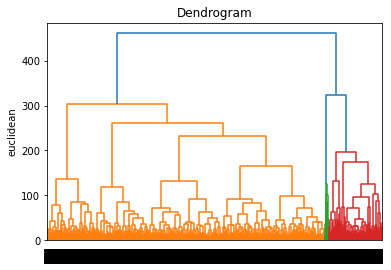

In [110]:
dendrogram(linked_ne) #uses the matrix to get to draw the dendrogram
plt.title("Dendrogram")
plt.ylabel('euclidean')
plt.show()

In [111]:
hc_ne=AgglomerativeClustering(n_clusters=3, linkage='ward')#initialize
hc_ne.fit(northeast_data)
northeast_data['clusters']=hc_ne.labels_

/var/folders/s5/sdqg9qvn0xl4bntbmypk1fb00000gn/T/ipykernel_55889/2913944698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northeast_data['clusters']=hc_ne.labels_


In [112]:
northeast_data.groupby('clusters').mean()

,cust_age,cust_income,hhld_size,days_since_last_visit,months_since_first_purch,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,basket_margin,response_flag,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_midwest,region_northeast,region_south,region_west
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.017938,-0.118546,0.015956,0.013072,0.087248,-0.314764,-0.195113,-0.196899,-0.295096,-0.292174,0.177404,0.012243,0.080344,0.056579,0.508209,0.329420,0.012090,0.013358,0.287226,0.712774,0.102556,0.508821,0.343674,0.044949,0.701056,0.071183,0.140509,0.087252,0.0,1.0,0.0,0.0
1,0.200943,0.742840,-0.135896,-0.040569,-0.384299,1.325145,0.570170,0.569228,1.266150,1.278278,-0.774362,0.015467,0.155919,0.126692,0.541681,0.146480,0.016377,0.012851,0.149778,0.850222,0.088025,0.581826,0.301149,0.029000,0.701467,0.095872,0.160582,0.042079,0.0,1.0,0.0,0.0
2,0.381645,2.825596,-0.004308,-0.388847,-0.562737,3.316280,6.968679,7.072666,3.548412,3.262306,-0.865753,0.005455,0.290909,0.243636,0.354545,0.069091,0.025455,0.016364,0.103636,0.896364,0.090909,0.661818,0.220000,0.027273,0.572727,0.169091,0.223636,0.034545,0.0,1.0,0.0,0.0


In [113]:
northeast_data['clusters'].value_counts()

0    45741
1     8793
2      550
Name: clusters, dtype: int64

In [114]:
response_flag_means = {0: 0.012243, 1: 0.015467, 2: 0.005455}

# Calculate the actual percentage of responders for each cluster
for i, cluster in enumerate(response_flag_means):
    mean = response_flag_means[i]
    percentage = mean * 100
    print(f"Cluster {cluster}: Actual Percentage of Responders = {percentage:.2f}%")

Cluster 0: Actual Percentage of Responders = 1.22%
Cluster 1: Actual Percentage of Responders = 1.55%
Cluster 2: Actual Percentage of Responders = 0.55%


In [115]:
# Assign cluster labels to the subset of 'northeast' region
df.loc[df['region'] == 'northeast', 'cluster_label'] = hc_ne.labels_
df['cluster_label'] = df['cluster_label'].fillna(0)
df['cluster_label'] = df['cluster_label'].astype(int)

In [103]:
linked_south = linkage(south_data, 'ward')

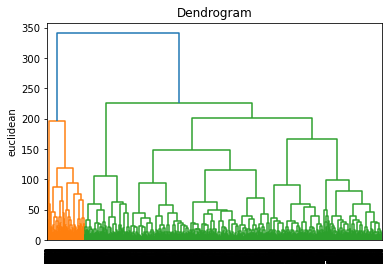

In [104]:
dendrogram(linked_south) #uses the matrix to get to draw the dendrogram
plt.title("Dendrogram")
plt.ylabel('euclidean')
plt.show()

In [105]:
hc_s=AgglomerativeClustering(n_clusters=2, linkage='ward')#initialize
hc_s.fit(south_data)
south_data['clusters']=hc_s.labels_

/var/folders/s5/sdqg9qvn0xl4bntbmypk1fb00000gn/T/ipykernel_55889/456082670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_data['clusters']=hc_s.labels_


In [106]:
south_data.groupby('clusters').mean()

,cust_age,cust_income,hhld_size,days_since_last_visit,months_since_first_purch,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,basket_margin,response_flag,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_midwest,region_northeast,region_south,region_west
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.007102,-0.111083,0.003786,0.014690,0.052060,-0.178434,-0.162742,-0.168499,-0.232501,-0.217002,0.061205,0.010313,0.093801,0.050064,0.509380,0.331651,0.003401,0.011702,0.271860,0.728140,0.098263,0.515780,0.339989,0.045968,0.674566,0.085902,0.147559,0.091973,0.0,0.0,1.0,0.0
1,0.079825,0.478915,0.057563,-0.180035,-0.520816,1.732798,1.309151,1.392546,1.977868,1.828922,-0.846756,0.014166,0.186181,0.081526,0.553339,0.165366,0.006938,0.006649,0.126337,0.873663,0.076323,0.586008,0.314542,0.023128,0.686904,0.097138,0.155825,0.060133,0.0,0.0,1.0,0.0


In [107]:
south_data['clusters'].value_counts()

0    27345
1     3459
Name: clusters, dtype: int64

In [108]:
response_flag_means = {0: 0.010313, 1: 0.014166}

# Calculate the actual percentage of responders for each cluster
for i, cluster in enumerate(response_flag_means):
    mean = response_flag_means[i]
    percentage = mean * 100
    print(f"Cluster {cluster}: Actual Percentage of Responders = {percentage:.2f}%")

Cluster 0: Actual Percentage of Responders = 1.03%
Cluster 1: Actual Percentage of Responders = 1.42%


In [116]:
# Assign cluster labels to the subset of 'south' region
df.loc[df['region'] == 'south', 'cluster_label'] = hc_s.labels_
df['cluster_label'] = df['cluster_label'].astype(int)

In [117]:
df.head()

,cust_age,cust_income,cust_profession,gender,hhld_size,marital_status,residence_status,response_flag,days_since_last_visit,months_since_first_purch,num_apparel_L6M,num_elec_L6M,num_haba_L6M,num_hw_L6M,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,region,cluster_label
0,28,90511.094109,SELF EMPLOYED,M,12,Married,Rental,0,205,24,0,0,0,0,0,0,0,0,0,0,29.000,0.08,0.04,0.54,0.28,south,0
1,54,83618.224024,HOMEMAKER,M,10,Married,Rental,0,206,56,0,0,0,0,0,0,0,0,0,0,14.542,0.12,0.06,0.28,0.20,northeast,0
2,39,73155.348765,SALARIED,F,7,Married,Rental,0,206,13,0,0,0,0,0,0,0,0,0,0,22.098,0.14,0.18,0.04,0.16,midwest,1
3,40,67395.740610,HOMEMAKER,M,6,Married,Rental,0,120,4,0,0,0,0,0,0,0,0,0,0,23.900,0.20,0.28,0.36,0.12,northeast,0
4,40,108115.075347,OTHER,M,6,Married,Rental,0,204,8,0,0,0,0,0,0,0,0,0,0,23.900,0.06,0.34,0.14,0.18,northeast,0


In [119]:
cust = pd.read_csv('~/Desktop/Data Modeling/customer-data.csv')

In [120]:
df['state'] = cust['state']

In [121]:
df['region'] = df['state'].apply(get_region)

In [122]:
unique_regions = df['region'].unique()

# Create a dictionary to store the subsets, with region names as keys and dataframes as values
region_subsets = {}

# Loop through the unique regions and create subsets based on each region
for region in unique_regions:
    subset = df[df['region'] == region] # Subset dataframe based on region
    region_subsets[region] = subset # Store the subset in the dictionary with the region name as key

# Access the subsets for each region using the dictionary keys
west_subset = region_subsets['west']
northeast_subset = region_subsets['northeast']
south_subset = region_subsets['south']
midwest_subset = region_subsets['midwest']

In [124]:
west_subset.reset_index(drop=True, inplace=True)
south_subset.reset_index(drop=True, inplace=True)
midwest_subset.reset_index(drop=True, inplace=True)
northeast_subset.reset_index(drop=True, inplace=True)

In [125]:
west_subset = west_subset.drop('state', axis = 1)
south_subset = south_subset.drop('state', axis = 1)
midwest_subset = midwest_subset.drop('state', axis = 1)
northeast_subset = northeast_subset.drop('state', axis = 1)

In [126]:
west_subset = pd.get_dummies(west_subset)
south_subset = pd.get_dummies(south_subset)
midwest_subset = pd.get_dummies(midwest_subset)
northeast_subset = pd.get_dummies(northeast_subset)

In [127]:
west_subset.groupby('cluster_label').mean()

,cust_age,cust_income,hhld_size,response_flag,days_since_last_visit,months_since_first_purch,num_apparel_L6M,num_elec_L6M,num_haba_L6M,num_hw_L6M,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_west
cluster_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39.337206,58710.818574,1.660960,0.003363,201.426169,21.136961,0.447264,0.442067,0.933659,1.932742,3.755732,79.551208,77.321920,172.261999,409.569856,761.121981,18.716742,0.169710,0.204665,0.333097,0.167190,0.077041,0.051972,0.526445,0.327117,0.003057,0.014369,0.262917,0.737083,0.100581,0.521247,0.332314,0.045858,0.667074,0.111587,0.136350,0.084989,1.0
1,40.799180,75555.435195,1.487705,0.024590,147.864754,9.942623,3.352459,3.536885,7.643443,12.270492,25.659836,2111.168033,2040.618852,2956.266393,5504.295082,9414.651639,13.418885,0.166885,0.198525,0.353934,0.154672,0.192623,0.143443,0.504098,0.139344,0.004098,0.016393,0.143443,0.856557,0.090164,0.577869,0.295082,0.036885,0.618852,0.151639,0.180328,0.049180,1.0
2,36.334552,54937.612042,1.484461,0.067642,64.815356,4.281536,0.605119,0.638026,1.074954,2.574040,4.892139,70.985375,87.261426,147.241316,369.908592,693.424132,19.715276,0.161499,0.197916,0.312102,0.159232,0.074954,0.040219,0.563071,0.310786,0.001828,0.009141,0.243144,0.756856,0.113346,0.436929,0.431444,0.018282,0.659963,0.087751,0.091408,0.160878,1.0


In [128]:
midwest_subset.groupby('cluster_label').mean()

,cust_age,cust_income,hhld_size,response_flag,days_since_last_visit,months_since_first_purch,num_apparel_L6M,num_elec_L6M,num_haba_L6M,num_hw_L6M,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_midwest
cluster_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39.881426,78228.893765,1.437286,0.015764,175.503770,13.479095,3.145305,2.989719,6.632625,10.649760,22.808088,1589.127485,1526.688143,2371.444825,4747.302262,8233.121316,13.374430,0.167512,0.201563,0.331624,0.166511,0.178890,0.087731,0.583962,0.136395,0.006169,0.006854,0.137766,0.862234,0.081563,0.507197,0.393420,0.017820,0.734750,0.056888,0.154901,0.053461,1.0
1,38.873137,57647.399477,1.572255,0.010000,184.668529,20.851275,0.487745,0.498137,0.920588,2.076471,3.980882,56.781569,62.447549,105.131471,292.137941,532.477941,19.462863,0.169869,0.202616,0.334141,0.166151,0.087843,0.049902,0.513529,0.339314,0.003529,0.005882,0.259608,0.740392,0.094804,0.501569,0.373039,0.030588,0.706275,0.056765,0.137255,0.099706,1.0


In [129]:
south_subset.groupby('cluster_label').mean()

,cust_age,cust_income,hhld_size,response_flag,days_since_last_visit,months_since_first_purch,num_apparel_L6M,num_elec_L6M,num_haba_L6M,num_hw_L6M,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_south
cluster_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39.804096,59007.152145,1.567563,0.010313,182.694862,20.136807,0.525983,0.516950,1.020735,2.247870,4.310294,77.352423,73.307149,147.572829,375.620223,693.768623,18.863910,0.169587,0.201893,0.334795,0.166308,0.093801,0.050064,0.509380,0.331651,0.003401,0.011702,0.271860,0.728140,0.098263,0.515780,0.339989,0.045968,0.674566,0.085902,0.147559,0.091973,1.0
1,40.773634,78109.108084,1.617809,0.014166,171.871639,12.180399,3.214802,3.286499,6.873952,11.431339,24.313964,1513.083261,1609.605955,2353.668401,4581.994507,8156.391154,13.372623,0.168702,0.201804,0.327875,0.168257,0.186181,0.081526,0.553339,0.165366,0.006938,0.006649,0.126337,0.873663,0.076323,0.586008,0.314542,0.023128,0.686904,0.097138,0.155825,0.060133,1.0


In [130]:
northeast_subset.groupby('cluster_label').mean()

,cust_age,cust_income,hhld_size,response_flag,days_since_last_visit,months_since_first_purch,num_apparel_L6M,num_elec_L6M,num_haba_L6M,num_hw_L6M,total_num_purch_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,cust_profession_HOMEMAKER,cust_profession_OTHER,cust_profession_SALARIED,cust_profession_SELF EMPLOYED,cust_profession_STUDENT,cust_profession_UNEMPLOYED,gender_F,gender_M,marital_status_Divorced / Separated,marital_status_Married,marital_status_Single,marital_status_Unknown,residence_status_Homeowners,residence_status_Other,residence_status_Rental,residence_status_Unknown,region_northeast
cluster_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39.683238,58765.522895,1.578934,0.012243,182.604950,20.625522,0.361295,0.354693,0.678647,1.488774,2.883409,45.777596,45.356966,85.098336,221.068276,412.336044,19.566673,0.169193,0.201427,0.334639,0.166401,0.080344,0.056579,0.508209,0.329420,0.012090,0.013358,0.287226,0.712774,0.102556,0.508821,0.343674,0.044949,0.701056,0.071183,0.140509,0.087252,1.0
1,42.124531,86654.052446,1.437052,0.015467,179.623450,14.076424,2.256909,2.275674,5.495622,10.300239,20.047310,792.258387,799.339588,1643.326055,3449.882861,6005.586830,13.810454,0.170583,0.202197,0.330538,0.165884,0.155919,0.126692,0.541681,0.146480,0.016377,0.012851,0.149778,0.850222,0.088025,0.581826,0.301149,0.029000,0.701467,0.095872,0.160582,0.042079,1.0
2,44.140000,154086.106103,1.560000,0.005455,160.265455,11.598182,9.218182,9.214545,10.900000,15.474545,40.887273,7033.565455,7199.683636,3921.176364,7529.000000,10960.163636,13.257731,0.171018,0.196873,0.328836,0.165164,0.290909,0.243636,0.354545,0.069091,0.025455,0.016364,0.103636,0.896364,0.090909,0.661818,0.220000,0.027273,0.572727,0.169091,0.223636,0.034545,1.0


In [145]:
tableau = pd.concat([northeast_subset, south_subset, west_subset, midwest_subset], axis = 0)

In [146]:
tableau['region_name'] = ''

# Use boolean indexing to set the region name based on the dummy variable
tableau.loc[tableau['region_northeast'] == 1, 'region_name'] = 'northeast'
tableau.loc[tableau['region_west'] == 1, 'region_name'] = 'west'
tableau.loc[tableau['region_south'] == 1, 'region_name'] = 'south'
tableau.loc[tableau['region_midwest'] == 1, 'region_name'] = 'midwest'

In [147]:
tableau = tableau.drop(['region_northeast', 'region_west', 'region_south', 'region_midwest'], axis = 1)

In [148]:
tableau1 = tableau.copy()

In [149]:
tableau1.to_csv('try.csv')

In [136]:
tableau['cust_profession'] = ''

# Use boolean indexing to set the region name based on the dummy variable
tableau.loc[tableau['cust_profession_HOMEMAKER'] == 1, 'cust_profession'] = 'homemaker'
tableau.loc[tableau['cust_profession_OTHER'] == 1, 'cust_profession'] = 'other'
tableau.loc[tableau['cust_profession_SALARIED'] == 1, 'cust_profession'] = 'salaried'
tableau.loc[tableau['cust_profession_SELF EMPLOYED'] == 1, 'cust_profession'] = 'self employed'
tableau.loc[tableau['cust_profession_STUDENT'] == 1, 'cust_profession'] = 'student'
tableau.loc[tableau['cust_profession_UNEMPLOYED'] == 1, 'cust_profession'] = 'unemployed'

In [137]:
tableau['marital_status'] = ''

# Use boolean indexing to set the region name based on the dummy variable
tableau.loc[tableau['marital_status_Divorced / Separated'] == 1, 'marital_status'] = 'Divorced / Separated'
tableau.loc[tableau['marital_status_Married'] == 1, 'marital_status'] = 'Married'
tableau.loc[tableau['marital_status_Single'] == 1, 'marital_status'] = 'Single'
tableau.loc[tableau['marital_status_Unknown'] == 1, 'marital_status'] = 'Unknown'

In [138]:
tableau['residence_status'] = ''

# Use boolean indexing to set the region name based on the dummy variable
tableau.loc[tableau['residence_status_Homeowners'] == 1, 'residence_status'] = 'Homeowners'
tableau.loc[tableau['residence_status_Other'] == 1, 'residence_status'] = 'Other'
tableau.loc[tableau['residence_status_Rental'] == 1, 'residence_status'] = 'Rental'
tableau.loc[tableau['residence_status_Unknown'] == 1, 'residence_status'] = 'Unknown'

In [139]:
tableau['gender'] = ''

# Use boolean indexing to set the region name based on the dummy variable
tableau.loc[tableau['gender_F'] == 1, 'gender'] = 'Female'
tableau.loc[tableau['gender_M'] == 1, 'gender'] = 'Male'

In [140]:
tableau.columns

Index(['cust_age', 'cust_income', 'hhld_size', 'response_flag',
       'days_since_last_visit', 'months_since_first_purch', 'num_apparel_L6M',
       'num_elec_L6M', 'num_haba_L6M', 'num_hw_L6M', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'total_dollars_L6M', 'basket_margin', 'margin_hw',
       'margin_elec', 'margin_haba', 'margin_apparel', 'cluster_label',
       'cust_profession_HOMEMAKER', 'cust_profession_OTHER',
       'cust_profession_SALARIED', 'cust_profession_SELF EMPLOYED',
       'cust_profession_STUDENT', 'cust_profession_UNEMPLOYED', 'gender_F',
       'gender_M', 'marital_status_Divorced / Separated',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'residence_status_Homeowners',
       'residence_status_Other', 'residence_status_Rental',
       'residence_status_Unknown', 'region_name', 'cust_profession',
       'marital_status', 'residence_status', 'gen

In [141]:
tableau = tableau.drop(['cust_profession_HOMEMAKER',
       'cust_profession_OTHER', 'cust_profession_SALARIED',
       'cust_profession_SELF EMPLOYED', 'cust_profession_STUDENT',
       'cust_profession_UNEMPLOYED', 'gender_F', 'gender_M',
       'marital_status_Divorced / Separated', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown',
       'residence_status_Homeowners', 'residence_status_Other',
       'residence_status_Rental', 'residence_status_Unknown' ], axis=1)

In [144]:
tableau.to_csv('tableau1.csv')#normaldataset with clusters

## Random Forest

In [155]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
ml = pd.DataFrame(analysis_final)

In [ ]:
x = ml.drop('response_flag', axis=1)
y = ml[['response_flag']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
clf=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=5,random_state=0)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.oob_score_

In [ ]:
clf.score(X_test,y_test)

In [ ]:
import sklearn.metrics as metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))#20p3r6f

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
mod=GridSearchCV(clf,param_grid={'n_estimators':range(5,200)})
mod.fit(X_train,y_train)

In [ ]:
mod.best_estimator_ #72

In [ ]:
clf=RandomForestClassifier(n_estimators=72,oob_score=True,n_jobs=-1,random_state=0)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.oob_score_

In [ ]:
clf.score(X_test,y_test)

In [ ]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))#24P2R3F99A

In [ ]:
probs = clf.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
predictions_clf = clf.predict(X_test)
print(mean_absolute_error(y_test, predictions_clf))

In [ ]:
clf.feature_importances_

In [ ]:
imp_feat_clf=pd.Series(clf.feature_importances_,index=x.columns.tolist())

In [ ]:
features_sorted = imp_feat_clf.sort_values(ascending=False)
features_sorted

In [ ]:
sns.barplot(x=features_sorted.index[:5], y=features_sorted.values[:5], color='black')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
classes = ["0", "1"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

In [ ]:
imp_feat_clf.sort_values(ascending=False).head()

In [ ]:
y_pred_clf = clf.predict(X_test)
y_pred_clf = pd.Series(y_pred)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
knn_model.score(X_test,y_test)

In [ ]:
param_grid = { 'n_neighbors': range(1,20), 'p': [1,2]} 

In [ ]:
grid = GridSearchCV(knn_model,param_grid,verbose=3,scoring="f1") #initalize 
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
from sklearn.pipeline import Pipeline 
pipe = Pipeline([('a', KNeighborsClassifier(n_neighbors=1,p=2))])
pipe.fit(X_train, y_train)
y_pred_pipe=pipe.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_pipe)
pipe.score(X_test,y_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
probs_knn = pipe.predict_proba(X_test)
prob_positive_knn = probs_knn[:,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_test, prob_positive_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
print('Area under the curve:',roc_auc_knn)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_knn, tpr_knn, 'orange', label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pipe.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.grid(False)
plt.show()

## Oversampling using Smote and using Gradient Boosting

In [193]:
smote = SMOTE(sampling_strategy=0.3)  

In [194]:
cols = list(analysis_final.columns)
cols.remove("response_flag")
sampled,target = smote.fit_resample(analysis_final[cols],analysis_final["response_flag"])

In [203]:
x = sampled
y = target

In [169]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [170]:
clf=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=72,random_state=0)

In [171]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=72, n_jobs=-1, oob_score=True,
                       random_state=0)

In [172]:
import sklearn.metrics as metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30078
           1       0.98      0.95      0.96      9078

    accuracy                           0.98     39156
   macro avg       0.98      0.97      0.98     39156
weighted avg       0.98      0.98      0.98     39156



Area under the curve: 0.9971390789909369


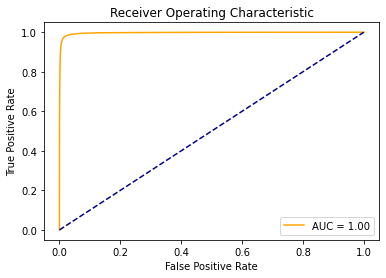

In [173]:
probs = clf.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [174]:
from sklearn.metrics import mean_absolute_error
predictions_clf = clf.predict(X_test)
print(mean_absolute_error(y_test, predictions_clf))

0.016957809786495047


In [175]:
clf.feature_importances_

array([0.08283408, 0.08240782, 0.16133089, 0.18802007, 0.05947741,
       0.05404447, 0.04341297, 0.04838054, 0.05289648, 0.07927419,
       0.02551672, 0.00768876, 0.01025038, 0.00893651, 0.00087438,
       0.00112561, 0.01055205, 0.00882296, 0.00691249, 0.01243212,
       0.01015255, 0.00387097, 0.00999948, 0.01247772, 0.01321034,
       0.00509801])

In [176]:
imp_feat_clf=pd.Series(clf.feature_importances_,index=x.columns.tolist())

In [177]:
features_sorted = imp_feat_clf.sort_values(ascending=False)
features_sorted

months_since_first_purch               0.188020
days_since_last_visit                  0.161331
cust_age                               0.082834
cust_income                            0.082408
basket_margin                          0.079274
total_num_purch_L6M                    0.059477
dollars_apparel_L6M                    0.054044
dollars_hw_L6M                         0.052896
dollars_haba_L6M                       0.048381
dollars_elec_L6M                       0.043413
cust_profession_HOMEMAKER              0.025517
region_south                           0.013210
region_northeast                       0.012478
marital_status_Married                 0.012432
gender_F                               0.010552
cust_profession_SALARIED               0.010250
marital_status_Single                  0.010153
region_midwest                         0.009999
cust_profession_SELF EMPLOYED          0.008937
gender_M                               0.008823
cust_profession_OTHER                  0

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [207]:
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x, y, test_size=0.3, random_state=0)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=0)

# Train the model
gbm.fit(x_train_b, y_train_b)

# Make predictions on the test set
y_pred = gbm.predict(x_test_b)

# Evaluate the model
accuracy = accuracy_score(y_test_b, y_pred)
auc = roc_auc_score(y_test_b, y_pred)
print("Accuracy: ", accuracy)
print("AUC: ", auc)

Accuracy:  0.9739758913065686
AUC:  0.9531813561453154


In [208]:
print(metrics.classification_report(y_test_b,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30078
           1       0.97      0.91      0.94      9078

    accuracy                           0.97     39156
   macro avg       0.97      0.95      0.96     39156
weighted avg       0.97      0.97      0.97     39156



Area under the curve: 0.9925047633734723


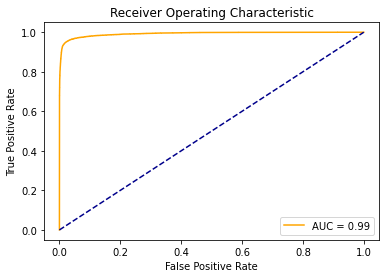

In [210]:
probs = gbm.predict_proba(x_test_b)
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_b, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [212]:
gbm.feature_importances_

array([0.0766191 , 0.04560657, 0.08119467, 0.39839416, 0.05488772,
       0.04105165, 0.03990957, 0.03873062, 0.03529737, 0.0437344 ,
       0.0374429 , 0.00772755, 0.0045493 , 0.00101552, 0.0004563 ,
       0.00105387, 0.00503564, 0.0090175 , 0.01997425, 0.00371945,
       0.0054126 , 0.00414117, 0.01198796, 0.00997082, 0.00680321,
       0.01626612])

In [213]:
imp_feat_clf=pd.Series(gbm.feature_importances_,index=x.columns.tolist())

In [214]:
features_sorted = imp_feat_clf.sort_values(ascending=False)
features_sorted

months_since_first_purch               0.398394
days_since_last_visit                  0.081195
cust_age                               0.076619
total_num_purch_L6M                    0.054888
cust_income                            0.045607
basket_margin                          0.043734
dollars_apparel_L6M                    0.041052
dollars_elec_L6M                       0.039910
dollars_haba_L6M                       0.038731
cust_profession_HOMEMAKER              0.037443
dollars_hw_L6M                         0.035297
marital_status_Divorced / Separated    0.019974
region_west                            0.016266
region_midwest                         0.011988
region_northeast                       0.009971
gender_M                               0.009017
cust_profession_OTHER                  0.007728
region_south                           0.006803
marital_status_Single                  0.005413
gender_F                               0.005036
cust_profession_SALARIED               0

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'months_since_first_purch'),
  Text(1, 0, 'days_since_last_visit'),
  Text(2, 0, 'cust_age'),
  Text(3, 0, 'total_num_purch_L6M'),
  Text(4, 0, 'cust_income')])

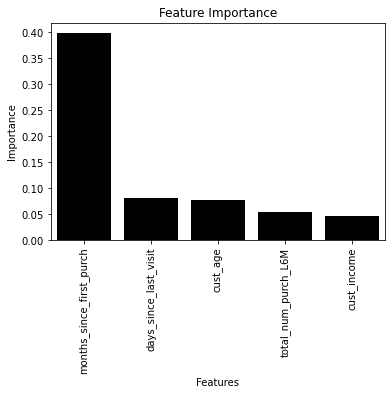

In [215]:
sns.barplot(x=features_sorted.index[:5], y=features_sorted.values[:5], color='black')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)